In [1]:
import pandas as pd

df = pd.read_csv("./classification.csv")

# Wenn du ein paar Spalten vorab aus den Daten entfernen
# df = df.drop("Spaltenname", axis = 1)

# Wenn du eine kategorische Variable in mehrere Spalten umwandeln
# möchtest, kannst du das mit folgendem Code tun:
# df = pd.get_dummies(df, columns = ["Spaltenname"])

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
from sklearn.model_selection import train_test_split

# Welche Spalten sollen zur Vorhersage verwendet werden
X = df[["age", "interest"]].values

# Oder: Die Spalte "success" soll nicht zur Vorhersage verwendet werden:
# X = df.drop("success", axis = 1).values

y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.svm import SVC

model = SVC(kernel = "linear", C = 0.001)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.506666666667


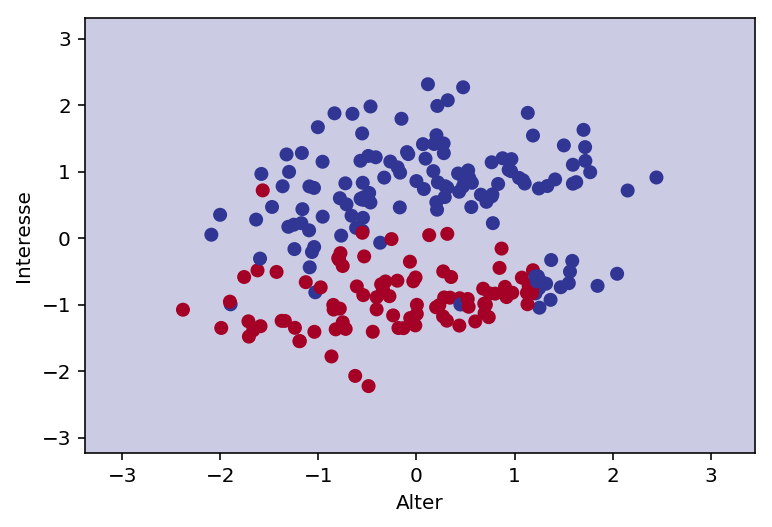

In [7]:
# Hinweis: Damit dieser Befehl funktioniert, muss die 
# "helper.py" - Datei im selben Ordner liegen, wie das
# aktuelle Jupyter Notebook

from helper import plot_classifier

# Trainings-Daten plotten
plot_classifier(model, X_train, y_train, proba = False, xlabel = "Alter", ylabel = "Interesse")

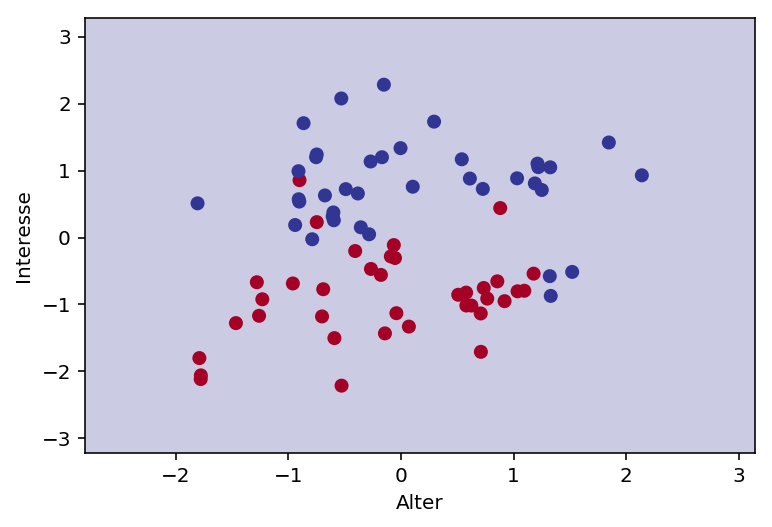

In [8]:
# Testdaten plotten

plot_classifier(model, X_test, y_test, proba = False, xlabel = "Alter", ylabel = "Interesse")